# Name: Harsh Sharma 
# Task-1
# Prediction Using Supervised Machine Learning 

# "Predict the percentage of marks of a student based on the number of study hours."

# Importing the Libraries 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [29]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.shape

(25, 2)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


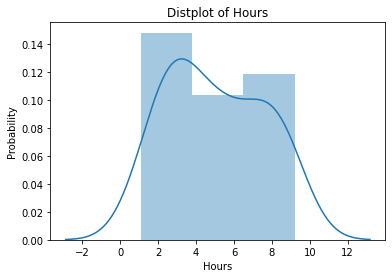

In [33]:
# Plotting the distribution of Hours
sns.distplot(df["Hours"])  
plt.title('Distplot of Hours')  
plt.xlabel('Hours')  
plt.ylabel('Probability')  
plt.show()

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


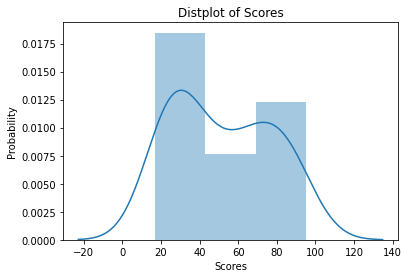

In [34]:
# Plotting the distribution of Scores
sns.distplot(df["Scores"])  
plt.title('Distplot of Scores')  
plt.xlabel('Scores')  
plt.ylabel('Probability')  
plt.show()

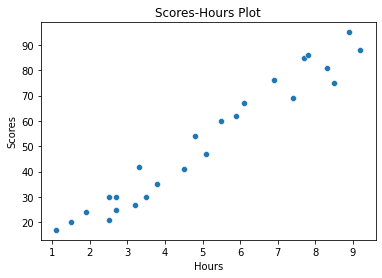

In [35]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores-Hours Plot')
plt.show()

In [36]:
x = df[['Hours']]
y = df[['Scores']]

In [37]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((20, 1), (5, 1))

In [38]:
from sklearn.linear_model import LinearRegression 

In [39]:
lr = LinearRegression(fit_intercept=True)

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
lr.intercept_

array([2.01816004])

In [42]:
lr.coef_

array([[9.91065648]])

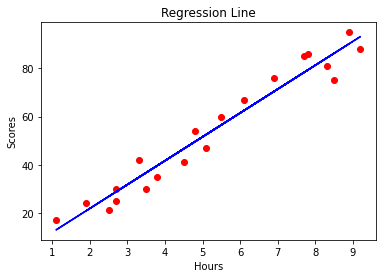

In [43]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

In [44]:
y_pred = lr.predict(X_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [45]:
y_pred=y_pred.flatten()

In [46]:
data = pd.DataFrame({'Actual': y_test.values.flatten(), 'Prediction': y_pred})

In [47]:
print(data)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [48]:
lr.score(X_test, y_test)

0.9454906892105356

In [49]:
hours = np.array(9.25).reshape(1,-1)
result = lr.predict(hours)
print("Number of Hours: ", np.ndarray.item(hours))
print("Predicted Score (%)", np.ndarray.item(result))

Number of Hours:  9.25
Predicted Score (%) 93.69173248737538


In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
mae = mean_absolute_error(y_test,y_pred)

In [52]:
print("The Mean Absolute Error is: ", mae)

The Mean Absolute Error is:  4.183859899002975
